In [81]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from  random import random,seed,randrange
import statistics
from scipy.stats import norm

In [82]:
N=100 #Numero de pasos
p = 0.5 #probabilidad de dar un paso hacia la derecha 
caminantes = 10000

def Varioscamn(N,M,p):
    Xtot=np.zeros(N+1)
    X2tot=np.zeros(N+1)
    for i in range(M):
        X = np.zeros(N+1) # Incluyo el cero
        X2 = np.zeros(N+1)

        x = 0.         # Start at origin. Desplazamiento respecto a la posición inicial
        X[0] = x
        X2[0] = x*x

        mu, sigma = 0, 0.1 
        s = np.random.normal(mu, sigma, N)

        for i in range(N):
            #Paso a la derecha con probabilidad p
            if nr.random() < p:
            #if random() < p: 
                x += s[i]    
            else:
                x -= s[i]
            X[i] = x
            X2[i] = x*x
            Xtot += X
            X2tot += X2
        Xtot /= N
        X2tot /=N
    Xprom = Xtot/M
    X2prom = X2tot/M
    DX2=X2prom-(Xprom*Xprom)
    return Xprom, DX2

Xprom, DX2 = Varioscamn(N,caminantes,p)

In [83]:
def lineFit(x, y):
    ''' Returns slope and y-intercept of linear fit to (x,y)
    data set'''
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

In [92]:
N=100 #Numero de pasos
p = 0.5 #probabilidad de dar un paso hacia la derecha 
caminantes = 10000

def Varioscamn(N,M,p):
    Xtot=np.zeros(N+1)
    X2tot=np.zeros(N+1)
    for i in range(M):
        X = np.zeros(N+1) # Incluyo el cero
        X2 = np.zeros(N+1)

        x = 0.         # Start at origin. Desplazamiento respecto a la posición inicial
        X[0] = x
        X2[0] = x*x

        mu, sigma = 2, 0.1 
        s = np.random.normal(mu, sigma, N)

        for i in range(N):
            #Paso a la derecha con probabilidad p
            if nr.random() < p:
            #if random() < p: 
                x += s[i]    
            else:
                x -= s[i]
            X[i] = x
            X2[i] = x*x
            Xtot += X
            X2tot += X2
        Xtot /= N
        X2tot /=N
    Xprom = Xtot/M
    X2prom = X2tot/M
    DX2=X2prom-(Xprom*Xprom)
    return Xprom, DX2

Xprom2, DX22 = Varioscamn(N,caminantes,p)

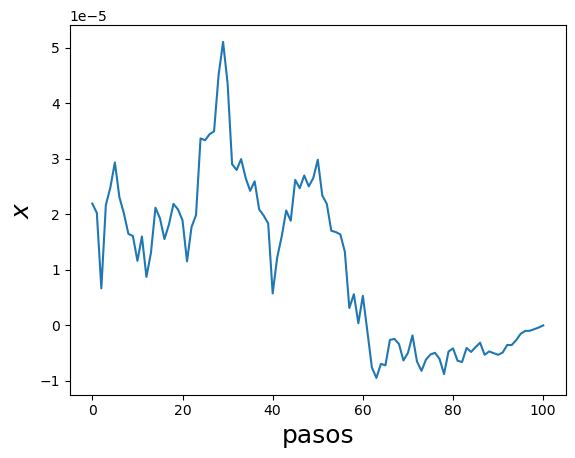

slope =  -8.685378024196501e-08
corte =  9.830023751161363e-06


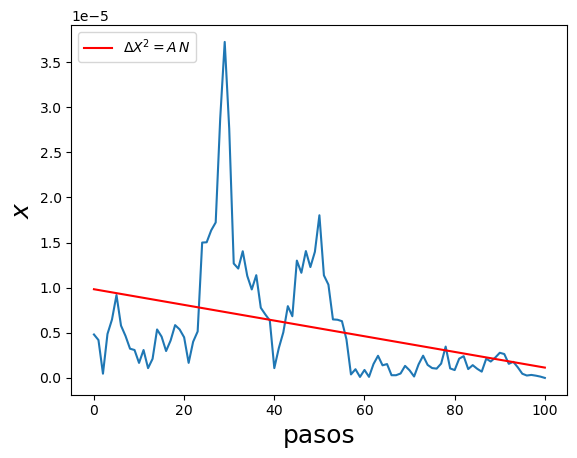

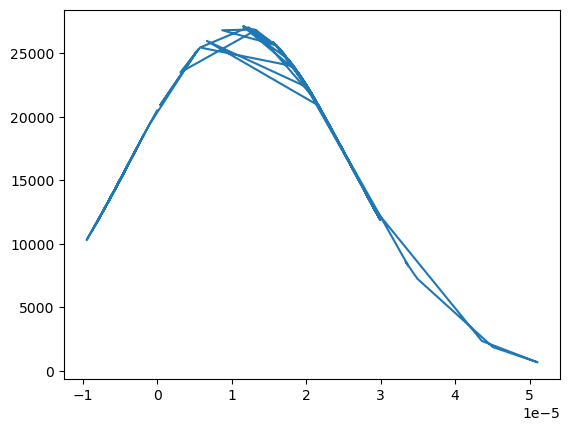

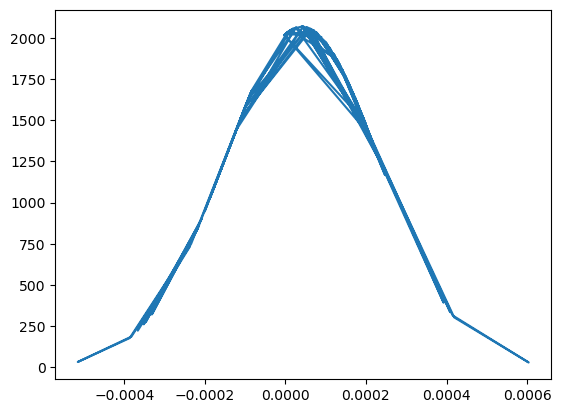

-2.247761007727177e-06


In [96]:
t=np.arange(0,N+1)
plt.plot(t,Xprom)
plt.xlabel('pasos',fontsize = 18)
plt.ylabel(r'$x$',fontsize = 18)
plt.show()

plt.plot(t,DX2)
plt.xlabel('pasos',fontsize = 18)
plt.ylabel(r'$x$',fontsize = 18)
slope, corte = lineFit(t,DX2)
plt.plot(t,slope*t+corte,color = 'red',label = r'$\Delta X^2 = A\, N$')
print('slope = ',slope)
print('corte = ',corte)
plt.legend(loc = 'upper left')
plt.show()

mean = statistics.mean(Xprom)
sd = statistics.stdev(Xprom)
plt.plot(Xprom, norm.pdf(Xprom, mean, sd))
plt.show()
mean = statistics.mean(Xprom2)
sd = statistics.stdev(Xprom2)
plt.plot(Xprom2, norm.pdf(Xprom2, mean, sd))
plt.show()
slope, corte = lineFit(t,DX22)
print(slope)


In [87]:
L=512
N=L*L
empty=-(N+1)
parent=np.zeros(N)
parent=np.loadtxt('parent512.txt')

[-2.00000e+00  0.00000e+00 -2.62145e+05 ... -2.62145e+05 -2.62145e+05
  2.60606e+05]


In [89]:
ns = np.zeros(N+1,dtype = int)
for i in range (N):
    if parent[i] != -(N+1):
        ns[1]+=1

[     0 131073      0 ...      0      0      0]


In [ ]:
global parent,N
def findroot(r):
    global parent
    while parent[r] >= 0:
        r = parent[r]
    return r
for i in range (N):
    r1=0
    r2=findroot(r1)
    def mergeroots(r1,r2):
        global spanclussize,parent,ns,touchesLeft,touchesRight
        if r1 == r2:
            return r1
        elif -parent[r1] > -parent[r2]:
            ns[-parent[r1]] -= 1
            ns[-parent[r2]] -= 1
            parent[r1] += parent[r2]
            parent[r2] = r1
            ns[-parent[r1]] += 1
            touchesLeft[r1] = touchesLeft[r1] or touchesLeft[r2] 
            touchesRight[r1] = touchesRight[r1] or touchesRight[r2]
            if touchesLeft[r1] and touchesRight[r1]:
                spanclussize = -parent[r1]
            return r1 
        else:
            ns[-parent[r1]] -= 1
            ns[-parent[r2]] -= 1
            parent[r2] += parent[r1]
            parent[r1] = r2
            ns[-parent[r2]] += 1
            touchesLeft[r2] = touchesLeft[r2] or touchesLeft[r1]
            touchesRight[r2] = touchesRight[r2] or touchesRight[r1]
            if touchesLeft[r2] and touchesRight[r2]:
                spanclussize = -parent[r2]
            return r2   
    r1+=1

In [91]:
#fracción de ocupación
j=0
for i in range (N):
    if parent[i] != -(N+1):
        j += 1
p=j/N
print(p)

0.5000038146972656
